In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [11]:
games = pd.read_parquet('../Datasets/gamesoh.parquet')
reviews = pd.read_parquet('../Datasets/reviews.parquet')
items = pd.read_parquet('../Datasets/itemso.parquet')

gnames = pd.read_parquet('../Datasets/games.parquet')
fnames = pd.read_parquet('../Datasets/fnames.parquet')

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29803 entries, 0 to 29802
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   item_id                29803 non-null  int32
 1   2D                     29803 non-null  int8 
 2   ACTION                 29803 non-null  int8 
 3   ADVENTURE              29803 non-null  int8 
 4   ANIME                  29803 non-null  int8 
 5   ARCADE                 29803 non-null  int8 
 6   ATMOSPHERIC            29803 non-null  int8 
 7   CASUAL                 29803 non-null  int8 
 8   CLASSIC                29803 non-null  int8 
 9   CO-OP                  29803 non-null  int8 
 10  COMEDY                 29803 non-null  int8 
 11  CUTE                   29803 non-null  int8 
 12  DESIGN & ILLUSTRATION  29803 non-null  int8 
 13  DIFFICULT              29803 non-null  int8 
 14  EARLY ACCESS           29803 non-null  int8 
 15  EXPLORATION            29803 non-nul

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   posted              59305 non-null  int32
 1   item_id             59305 non-null  int32
 2   recommend           59305 non-null  bool 
 3   user_id             59305 non-null  int32
 4   sentiment_analysis  59305 non-null  int8 
dtypes: bool(1), int32(3), int8(1)
memory usage: 1.2 MB


In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197727 entries, 0 to 5197726
Data columns (total 3 columns):
 #   Column            Dtype
---  ------            -----
 0   item_id           int32
 1   playtime_forever  int32
 2   user_id           int32
dtypes: int32(3)
memory usage: 59.5 MB


In [40]:
games.drop(columns=['item_id']).sum()

2D               1939
ACTION          11980
ADVENTURE        9194
ANIME            1274
ARCADE            915
                ...  
TURN-BASED        940
UTILITIES         526
VIOLENT           476
VISUAL NOVEL      611
ZOMBIES           490
Length: 61, dtype: int64

In [29]:
games.drop(columns=['item_id']).sum().describe()

count       61.000000
mean      2043.622951
std       2996.467744
min        476.000000
25%        611.000000
50%       1071.000000
75%       1432.000000
max      16294.000000
dtype: float64

In [31]:
suma_por_genero=games.drop(columns=['item_id']).sum()

In [81]:
sns.set(style="darkgrid")

Creamos una visualización para la la cantidad de juegos por genero dentro del Dataset

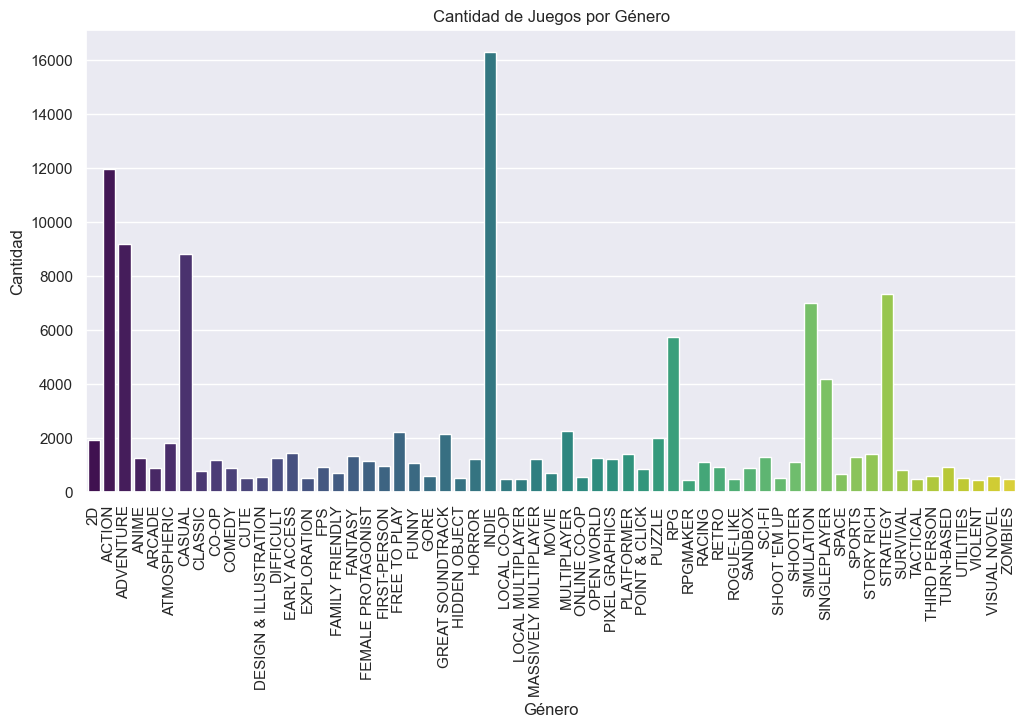

In [84]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.barplot(x=suma_por_genero.index, y=suma_por_genero.values, hue=suma_por_genero.index, palette='viridis', dodge=False)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de Juegos por Género')
plt.show()

podemos ver que tenemos una tendencia de generos dominantes, los cuales tienen una cantidad mayor a 2500 aprox.; por lo que realizamos un filtro para obtener los generos dominantes del Dataset

In [47]:
valores_mayores_2500 = suma_por_genero[suma_por_genero > 2500]
valores_mayores_2500 = valores_mayores_2500.sort_values(ascending=False)

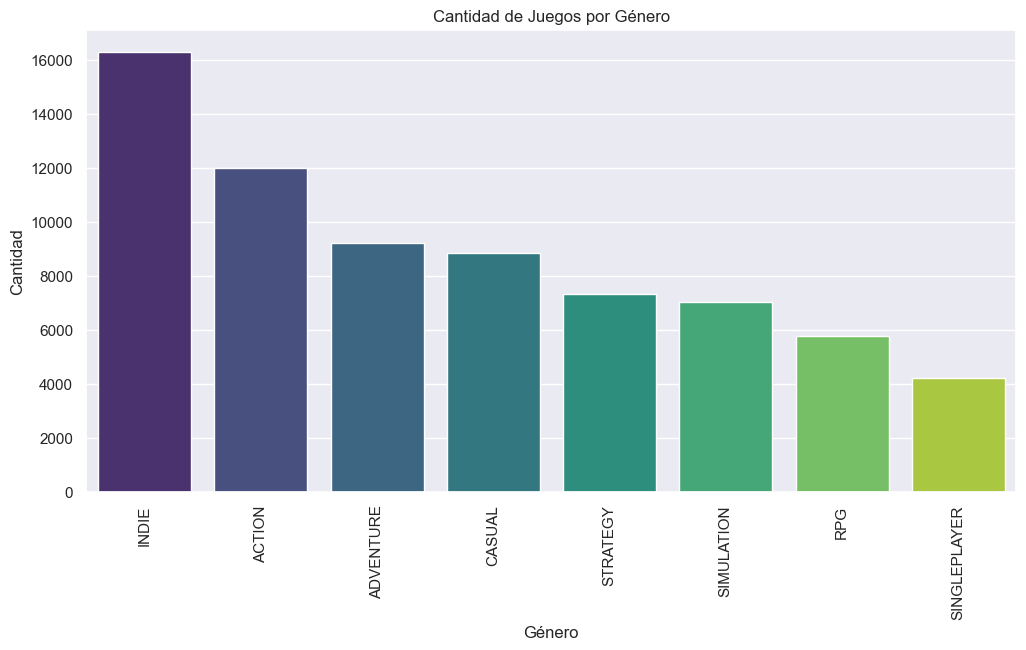

In [85]:
plt.figure(figsize=(12, 6))  
sns.barplot(x=valores_mayores_2500.index, y=valores_mayores_2500.values, hue=valores_mayores_2500.index, palette='viridis', dodge=False)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de Juegos por Género')
plt.show()

vemos que el genero Indie es el genero dominante

In [49]:
reviews.head()

,posted,item_id,recommend,user_id,sentiment_analysis
0,2014,1250,True,0,1
1,2014,113200,True,1,2
2,2014,440,True,1,2
3,2014,730,True,2,2
4,2015,105600,True,2,2


In [51]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   posted              59305 non-null  int32
 1   item_id             59305 non-null  int32
 2   recommend           59305 non-null  bool 
 3   user_id             59305 non-null  int32
 4   sentiment_analysis  59305 non-null  int8 
dtypes: bool(1), int32(3), int8(1)
memory usage: 1.2 MB


In [26]:
reviews.value_counts('recommend')

recommend
True     52473
False     6832
Name: count, dtype: int64

In [27]:
reviews.value_counts('sentiment_analysis')

sentiment_analysis
2    40010
1    10982
0     8313
Name: count, dtype: int64

In [57]:
reviews.value_counts('sentiment_analysis')

sentiment_analysis
2    40010
1    10982
0     8313
Name: count, dtype: int64

In [59]:
df=reviews.groupby('sentiment_analysis')['recommend'].value_counts()

In [60]:
df

sentiment_analysis  recommend
0                   True          5915
                    False         2398
1                   True          9812
                    False         1170
2                   True         36746
                    False         3264
Name: count, dtype: int64

In [69]:
df[0]

recommend
True     5915
False    2398
Name: count, dtype: int64

visualizamos el sentimiento de las reseñas de los usuarios

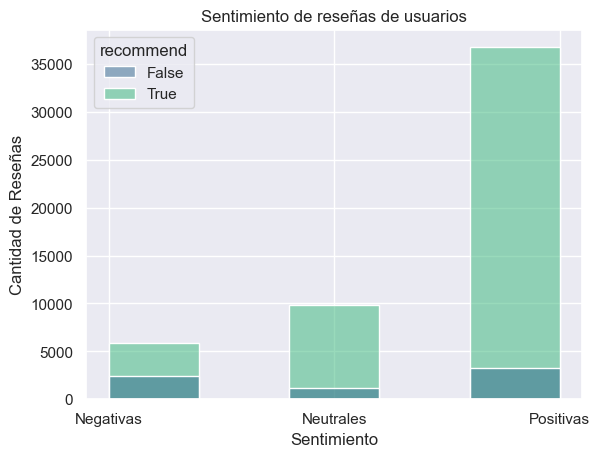

In [86]:
sns.histplot(data=reviews,x='sentiment_analysis',bins=5,palette='viridis',hue='recommend')
plt.title('Sentimiento de reseñas de usuarios')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

podemos ver que en todos los analisis de sentimientos se encuentran recomend=False, si bien en positivas concuerda que existe un minimo de falsos aceptable, en negativas tenemos un alto porcentaje de true por lo que deberiamos verificar el por que esta tomando recomendaciones positivas como negativas.

In [90]:
reviews.head()

,posted,item_id,recommend,user_id,sentiment_analysis
0,2014,1250,True,0,1
1,2014,113200,True,1,2
2,2014,440,True,1,2
3,2014,730,True,2,2
4,2015,105600,True,2,2


In [93]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   posted              59305 non-null  int32
 1   item_id             59305 non-null  int32
 2   recommend           59305 non-null  bool 
 3   user_id             59305 non-null  int32
 4   sentiment_analysis  59305 non-null  int8 
dtypes: bool(1), int32(3), int8(1)
memory usage: 1.2 MB


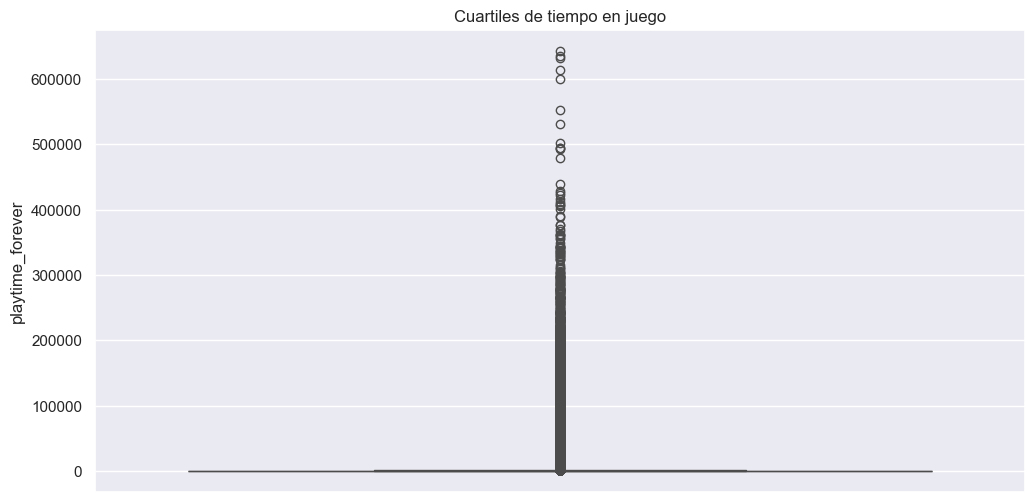

In [300]:
plt.figure(figsize=(12, 6))  
sns.boxplot(data=items, y='playtime_forever')
plt.title('Cuartiles de tiempo en juego')
plt.show()

tenemos ususarios con mucho mas de 100.000 horas acumuladas, no necesariamente son outliers, 

la plataforma steam se lanzo en el 2007, tenemos registros hasta el año 2021 por lo que da un resultado de 122.640 horas, tiempo de juego mayor a este numero si se considera un outlier

In [309]:
df1=items[items['playtime_forever']<122640]

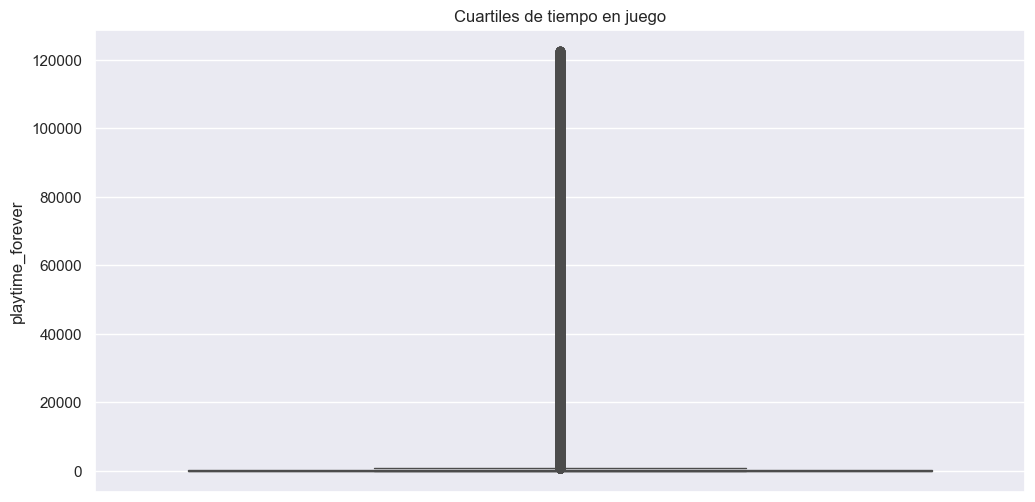

In [310]:
plt.figure(figsize=(12, 6))  
sns.boxplot(data=df1, y='playtime_forever')
plt.title('Cuartiles de tiempo en juego')
plt.show()

teoricamente es imposible que una persona pudiera jugar mas de 8 horas por dia por lo que tenemos otro dato para reducir los outliers: 15330 horas seria un tope para la cantidad de horas jugadas en 14 años

In [316]:
df1=items[items['playtime_forever']<15330]
df1=df1[df1['playtime_forever']>0]

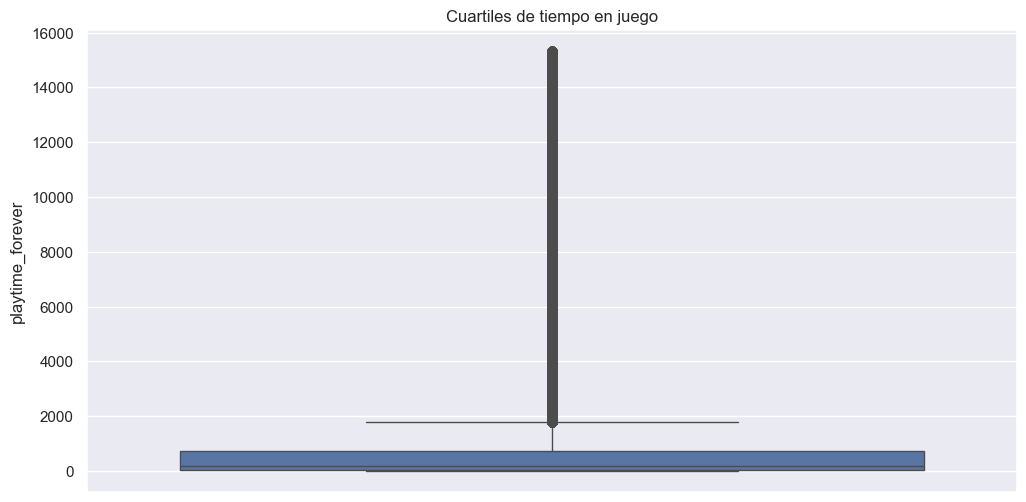

In [317]:
plt.figure(figsize=(12, 6))  
sns.boxplot(data=df1, y='playtime_forever')
plt.title('Cuartiles de tiempo en juego')
plt.show()

con esto concluimos, podria deberse a la gran afluencia de nuevos usuarios ya que en su mayoria acumulan mas de 2000 horas de juego, como no tenemos el dato de ingreso de usuario junto a otras estadisticas, descartamos la eliminacion de outliers para horas de juego

In [318]:
df = pd.merge(reviews,games, on='item_id', how='inner')

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50577 entries, 0 to 50576
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   posted                 50577 non-null  int32
 1   item_id                50577 non-null  int32
 2   recommend              50577 non-null  bool 
 3   user_id                50577 non-null  int32
 4   sentiment_analysis     50577 non-null  int8 
 5   2D                     50577 non-null  int8 
 6   ACTION                 50577 non-null  int8 
 7   ADVENTURE              50577 non-null  int8 
 8   ANIME                  50577 non-null  int8 
 9   ARCADE                 50577 non-null  int8 
 10  ATMOSPHERIC            50577 non-null  int8 
 11  CASUAL                 50577 non-null  int8 
 12  CLASSIC                50577 non-null  int8 
 13  CO-OP                  50577 non-null  int8 
 14  COMEDY                 50577 non-null  int8 
 15  CUTE                   50577 non-nul

In [211]:
df.columns

Index(['posted', 'item_id', 'recommend', 'user_id', 'sentiment_analysis', '2D',
       'ACTION', 'ADVENTURE', 'ANIME', 'ARCADE', 'ATMOSPHERIC', 'CASUAL',
       'CLASSIC', 'CO-OP', 'COMEDY', 'CUTE', 'DESIGN & ILLUSTRATION',
       'DIFFICULT', 'EARLY ACCESS', 'EXPLORATION', 'FPS', 'FAMILY FRIENDLY',
       'FANTASY', 'FEMALE PROTAGONIST', 'FIRST-PERSON', 'FREE TO PLAY',
       'FUNNY', 'GORE', 'GREAT SOUNDTRACK', 'HIDDEN OBJECT', 'HORROR', 'INDIE',
       'LOCAL CO-OP', 'LOCAL MULTIPLAYER', 'MASSIVELY MULTIPLAYER', 'MOVIE',
       'MULTIPLAYER', 'ONLINE CO-OP', 'OPEN WORLD', 'PIXEL GRAPHICS',
       'PLATFORMER', 'POINT & CLICK', 'PUZZLE', 'RPG', 'RPGMAKER', 'RACING',
       'RETRO', 'ROGUE-LIKE', 'SANDBOX', 'SCI-FI', 'SHOOT 'EM UP', 'SHOOTER',
       'SIMULATION', 'SINGLEPLAYER', 'SPACE', 'SPORTS', 'STORY RICH',
       'STRATEGY', 'SURVIVAL', 'TACTICAL', 'THIRD PERSON', 'TURN-BASED',
       'UTILITIES', 'VIOLENT', 'VISUAL NOVEL', 'ZOMBIES'],
      dtype='object')

In [212]:
suma_por_genero=df.drop(columns=['posted', 'item_id', 'recommend', 'user_id', 'sentiment_analysis']).sum()

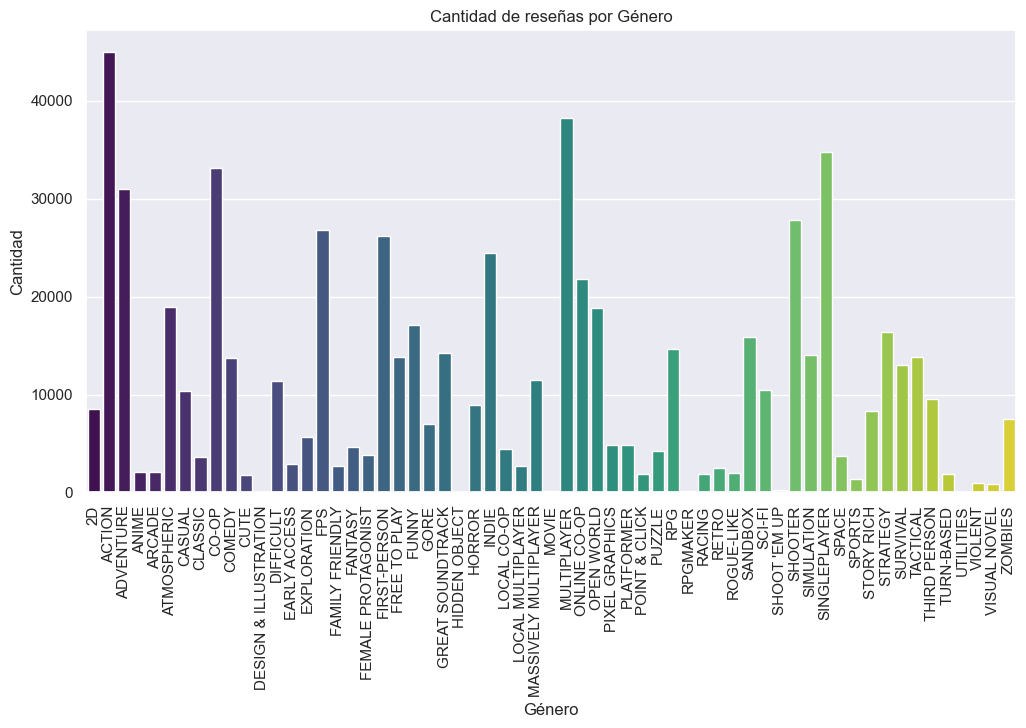

In [213]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.barplot(x=suma_por_genero.index, y=suma_por_genero.values, hue=suma_por_genero.index, palette='viridis', dodge=False)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de reseñas por Género')
plt.show()

podemos ver que los juegos mas populares cuentan con mas de 20.000 reseñas, por lo que realizamos un grafico

In [214]:
valores_mayores_20000 = suma_por_genero[suma_por_genero > 20000]
valores_mayores_20000 = valores_mayores_20000.sort_values(ascending=False)

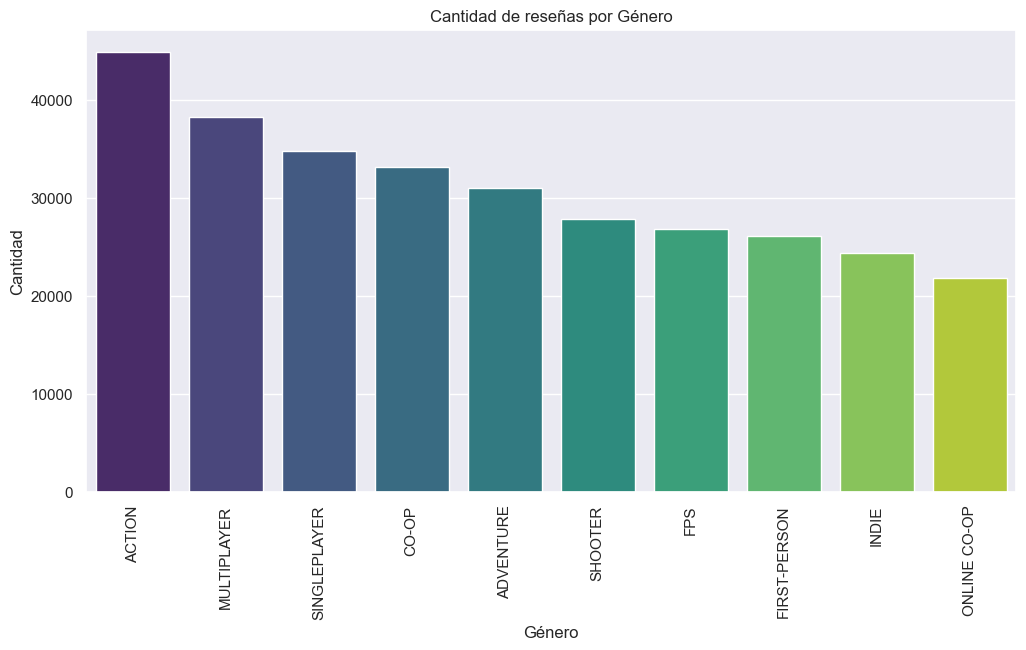

In [215]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.barplot(x=valores_mayores_20000.index, y=valores_mayores_20000.values, hue=valores_mayores_20000.index, palette='viridis', dodge=False)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de reseñas por Género')
plt.show()

podemos ver que el genero con mayor cantidad de reseñas es el genero Action

In [216]:
juegos_comentados=list(valores_mayores_20000.index)

In [217]:
juegos_comentados

['ACTION',
 'MULTIPLAYER',
 'SINGLEPLAYER',
 'CO-OP',
 'ADVENTURE',
 'SHOOTER',
 'FPS',
 'FIRST-PERSON',
 'INDIE',
 'ONLINE CO-OP']

In [218]:
df[['sentiment_analysis','ACTION',
 'MULTIPLAYER',
 'SINGLEPLAYER',
 'CO-OP',
 'ADVENTURE',
 'SHOOTER',
 'FPS',
 'FIRST-PERSON',
 'INDIE',
 'ONLINE CO-OP']]

,sentiment_analysis,ACTION,MULTIPLAYER,SINGLEPLAYER,CO-OP,ADVENTURE,SHOOTER,FPS,FIRST-PERSON,INDIE,ONLINE CO-OP
0,1,1,1,1,1,1,1,1,1,0,1
1,2,1,1,1,1,1,1,1,1,0,1
2,2,1,1,1,1,1,1,1,1,0,1
3,2,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
50572,2,0,0,0,0,0,0,0,0,0,0
50573,2,1,0,0,0,1,0,1,0,1,0
50574,2,1,0,0,0,1,0,0,0,1,0
50575,0,1,0,0,0,0,0,0,0,1,0


In [219]:
df_filtered = df[['sentiment_analysis','ACTION',
 'MULTIPLAYER',
 'SINGLEPLAYER',
 'CO-OP',
 'ADVENTURE',
 'SHOOTER',
 'FPS',
 'FIRST-PERSON',
 'INDIE',
 'ONLINE CO-OP']]

In [220]:
df_filtered

,sentiment_analysis,ACTION,MULTIPLAYER,SINGLEPLAYER,CO-OP,ADVENTURE,SHOOTER,FPS,FIRST-PERSON,INDIE,ONLINE CO-OP
0,1,1,1,1,1,1,1,1,1,0,1
1,2,1,1,1,1,1,1,1,1,0,1
2,2,1,1,1,1,1,1,1,1,0,1
3,2,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
50572,2,0,0,0,0,0,0,0,0,0,0
50573,2,1,0,0,0,1,0,1,0,1,0
50574,2,1,0,0,0,1,0,0,0,1,0
50575,0,1,0,0,0,0,0,0,0,1,0


In [221]:
df_grouped = df_filtered.groupby(['sentiment_analysis']).sum().transpose()

In [222]:
df_grouped

sentiment_analysis,0,1,2
ACTION,6195,8398,30364
MULTIPLAYER,5166,7341,25773
SINGLEPLAYER,4962,6006,23808
CO-OP,4387,6498,22281
ADVENTURE,4461,5428,21144
SHOOTER,3719,5603,18553
FPS,3594,5384,17868
FIRST-PERSON,3560,5259,17336
INDIE,3682,4242,16505
ONLINE CO-OP,2564,4552,14707


In [223]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ACTION to ONLINE CO-OP
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10 non-null     int64
 1   1       10 non-null     int64
 2   2       10 non-null     int64
dtypes: int64(3)
memory usage: 320.0+ bytes


In [224]:
df_grouped.columns

Index([0, 1, 2], dtype='int8', name='sentiment_analysis')

In [225]:
df_grouped.index

Index(['ACTION', 'MULTIPLAYER', 'SINGLEPLAYER', 'CO-OP', 'ADVENTURE',
       'SHOOTER', 'FPS', 'FIRST-PERSON', 'INDIE', 'ONLINE CO-OP'],
      dtype='object')

In [226]:
df=df_grouped

tomamos el mismo grafico y analizamos el sentimiento de los usuarios, para verificar que el genero action sea el genero con mas comentarios positivos

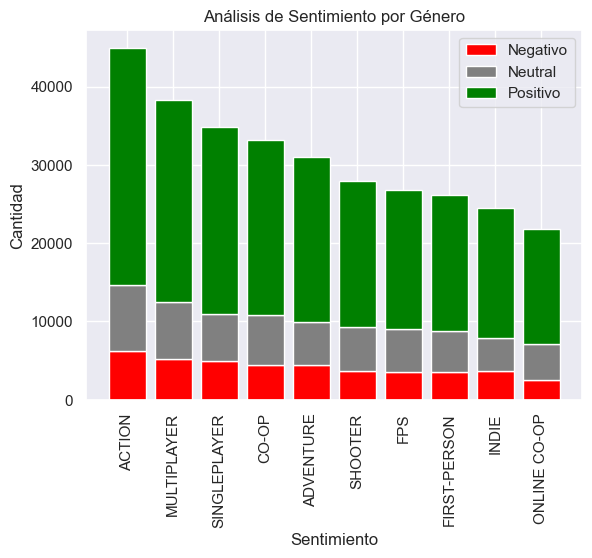

In [227]:
fig, ax = plt.subplots()

# Definir colores para cada categoría
colors = ['red', 'gray', 'green']
lbl = ['Negativo', 'Neutral', 'Positivo']

# Iterar sobre las columnas del DataFrame
for i, col in enumerate(df.columns):
    # Graficar las barras apiladas
    ax.bar(df.index, df[col], bottom=df[df.columns[0:i]].sum(axis=1), label=lbl[i], color=colors[i])

# Añadir leyenda
ax.legend()

# Añadir etiquetas y título
ax.set_ylabel('Cantidad')
ax.set_xlabel('Sentimiento')
ax.set_title('Análisis de Sentimiento por Género')
plt.xticks(rotation=90)
plt.show()

encontramos la misma proporcion Action junto con multiplayer

In [321]:
df = pd.merge(reviews,games, on='item_id', how='inner')

In [322]:
df

,posted,item_id,recommend,user_id,sentiment_analysis,2D,ACTION,ADVENTURE,ANIME,ARCADE,...,STORY RICH,STRATEGY,SURVIVAL,TACTICAL,THIRD PERSON,TURN-BASED,UTILITIES,VIOLENT,VISUAL NOVEL,ZOMBIES
0,2014,1250,True,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2013,1250,True,8,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2013,1250,True,60,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2013,1250,True,102,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2014,1250,True,215,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50572,2014,334780,True,25433,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50573,2015,369000,True,25440,2,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
50574,2015,385980,True,25440,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50575,2015,385630,True,25440,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
df2=df[['posted','sentiment_analysis','ACTION', 'MULTIPLAYER', 'SINGLEPLAYER', 'CO-OP', 'ADVENTURE',
       'SHOOTER', 'FPS', 'FIRST-PERSON', 'INDIE', 'ONLINE CO-OP']].copy()

In [326]:
df2

,posted,sentiment_analysis,ACTION,MULTIPLAYER,SINGLEPLAYER,CO-OP,ADVENTURE,SHOOTER,FPS,FIRST-PERSON,INDIE,ONLINE CO-OP
0,2014,1,1,1,1,1,1,1,1,1,0,1
1,2013,2,1,1,1,1,1,1,1,1,0,1
2,2013,2,1,1,1,1,1,1,1,1,0,1
3,2013,2,1,1,1,1,1,1,1,1,0,1
4,2014,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50572,2014,2,0,0,0,0,0,0,0,0,0,0
50573,2015,2,1,0,0,0,1,0,1,0,1,0
50574,2015,2,1,0,0,0,1,0,0,0,1,0
50575,2015,0,1,0,0,0,0,0,0,0,1,0


In [339]:
dfa=df2[(df2['sentiment_analysis'] > 1) & (df2['ACTION']>0)]

In [340]:
dfa=dfa.groupby('posted')['sentiment_analysis'].sum().reset_index()

In [341]:
dfa

,posted,sentiment_analysis
0,2010,76
1,2011,658
2,2012,1398
3,2013,7688
4,2014,32660
5,2015,18248


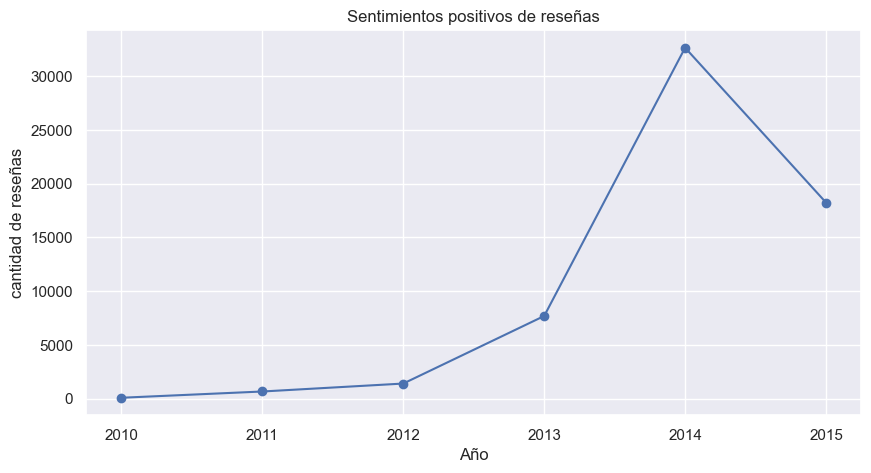

In [342]:
plt.figure(figsize=(10, 5))
plt.plot(dfa['posted'], dfa['sentiment_analysis'], marker='o', linestyle='-', color='b')
plt.title('Sentimientos positivos de reseñas para Accion')
plt.xlabel('Año')
plt.ylabel('cantidad de reseñas')
plt.show()

In [343]:
dfb=df2[(df2['sentiment_analysis'] > 1) & (df2['MULTIPLAYER']>0)]
dfb=dfb.groupby('posted')['sentiment_analysis'].sum().reset_index()
dfc=df2[(df2['sentiment_analysis'] > 1) & (df2['SINGLEPLAYER']>0)]
dfc=dfc.groupby('posted')['sentiment_analysis'].sum().reset_index()
dfd=df2[(df2['sentiment_analysis'] > 1) & (df2['CO-OP']>0)]
dfd=dfd.groupby('posted')['sentiment_analysis'].sum().reset_index()
dfe=df2[(df2['sentiment_analysis'] > 1) & (df2['ADVENTURE']>0)]
dfe=dfe.groupby('posted')['sentiment_analysis'].sum().reset_index()
dff=df2[(df2['sentiment_analysis'] > 1) & (df2['SHOOTER']>0)]
dff=dff.groupby('posted')['sentiment_analysis'].sum().reset_index()

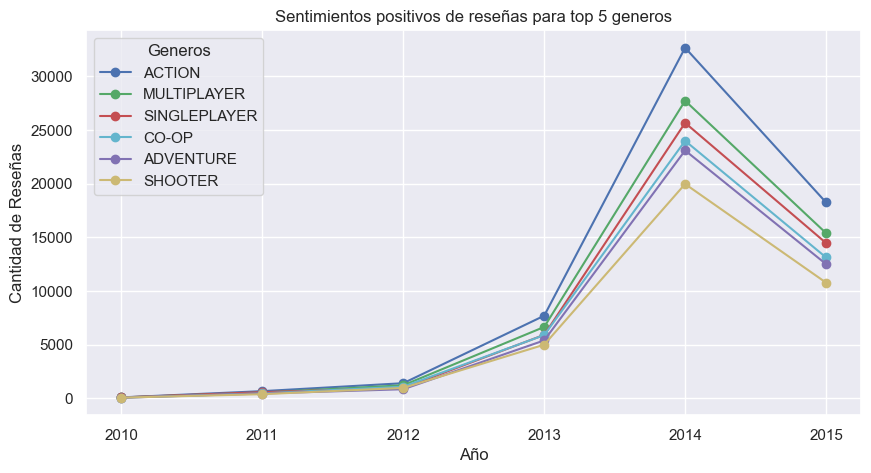

In [346]:
plt.figure(figsize=(10, 5))
plt.plot(dfa['posted'], dfa['sentiment_analysis'], marker='o', linestyle='-', color='b', label='ACTION')
plt.plot(dfb['posted'], dfb['sentiment_analysis'], marker='o', linestyle='-', color='g', label='MULTIPLAYER')
plt.plot(dfc['posted'], dfc['sentiment_analysis'], marker='o', linestyle='-', color='r', label='SINGLEPLAYER')
plt.plot(dfd['posted'], dfd['sentiment_analysis'], marker='o', linestyle='-', color='c', label='CO-OP')
plt.plot(dfe['posted'], dfe['sentiment_analysis'], marker='o', linestyle='-', color='m', label='ADVENTURE')
plt.plot(dff['posted'], dff['sentiment_analysis'], marker='o', linestyle='-', color='y', label='SHOOTER')

plt.title('Sentimientos positivos de reseñas para top 5 generos')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Generos')  # Agrega la leyenda con título
plt.show()

a lo largo de los años tenemos un pico de audiencia en el año 2014, viendo el descenso en picada, tendriamos que ver nuevos datos para verificar la tendencia de generos para años actuales, ya que esta medida indica la disminución de pupularidad de estos generos

In [244]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197727 entries, 0 to 5197726
Data columns (total 3 columns):
 #   Column            Dtype
---  ------            -----
 0   item_id           int32
 1   playtime_forever  int32
 2   user_id           int32
dtypes: int32(3)
memory usage: 59.5 MB


In [245]:
df = pd.merge(items,games, on='item_id', how='inner')

In [246]:
df

,item_id,playtime_forever,user_id,2D,ACTION,ADVENTURE,ANIME,ARCADE,ATMOSPHERIC,CASUAL,...,STORY RICH,STRATEGY,SURVIVAL,TACTICAL,THIRD PERSON,TURN-BASED,UTILITIES,VIOLENT,VISUAL NOVEL,ZOMBIES
0,10,6,615,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
1,10,0,21386,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,10,0,25485,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,10,93,19776,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,10,108,25489,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251877,444770,46,70540,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4251878,375450,51,76259,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4251879,353390,0,10872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4251880,354280,164,11108,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [247]:
df.columns

Index(['item_id', 'playtime_forever', 'user_id', '2D', 'ACTION', 'ADVENTURE',
       'ANIME', 'ARCADE', 'ATMOSPHERIC', 'CASUAL', 'CLASSIC', 'CO-OP',
       'COMEDY', 'CUTE', 'DESIGN & ILLUSTRATION', 'DIFFICULT', 'EARLY ACCESS',
       'EXPLORATION', 'FPS', 'FAMILY FRIENDLY', 'FANTASY',
       'FEMALE PROTAGONIST', 'FIRST-PERSON', 'FREE TO PLAY', 'FUNNY', 'GORE',
       'GREAT SOUNDTRACK', 'HIDDEN OBJECT', 'HORROR', 'INDIE', 'LOCAL CO-OP',
       'LOCAL MULTIPLAYER', 'MASSIVELY MULTIPLAYER', 'MOVIE', 'MULTIPLAYER',
       'ONLINE CO-OP', 'OPEN WORLD', 'PIXEL GRAPHICS', 'PLATFORMER',
       'POINT & CLICK', 'PUZZLE', 'RPG', 'RPGMAKER', 'RACING', 'RETRO',
       'ROGUE-LIKE', 'SANDBOX', 'SCI-FI', 'SHOOT 'EM UP', 'SHOOTER',
       'SIMULATION', 'SINGLEPLAYER', 'SPACE', 'SPORTS', 'STORY RICH',
       'STRATEGY', 'SURVIVAL', 'TACTICAL', 'THIRD PERSON', 'TURN-BASED',
       'UTILITIES', 'VIOLENT', 'VISUAL NOVEL', 'ZOMBIES'],
      dtype='object')

In [248]:
df.drop(columns=['item_id', 'user_id'], inplace=True)

In [249]:
df

,playtime_forever,2D,ACTION,ADVENTURE,ANIME,ARCADE,ATMOSPHERIC,CASUAL,CLASSIC,CO-OP,...,STORY RICH,STRATEGY,SURVIVAL,TACTICAL,THIRD PERSON,TURN-BASED,UTILITIES,VIOLENT,VISUAL NOVEL,ZOMBIES
0,6,0,1,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,0
3,93,0,1,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,0
4,108,0,1,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251877,46,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4251878,51,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4251879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4251880,164,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
list(df.columns[1:])

['2D',
 'ACTION',
 'ADVENTURE',
 'ANIME',
 'ARCADE',
 'ATMOSPHERIC',
 'CASUAL',
 'CLASSIC',
 'CO-OP',
 'COMEDY',
 'CUTE',
 'DESIGN & ILLUSTRATION',
 'DIFFICULT',
 'EARLY ACCESS',
 'EXPLORATION',
 'FPS',
 'FAMILY FRIENDLY',
 'FANTASY',
 'FEMALE PROTAGONIST',
 'FIRST-PERSON',
 'FREE TO PLAY',
 'FUNNY',
 'GORE',
 'GREAT SOUNDTRACK',
 'HIDDEN OBJECT',
 'HORROR',
 'INDIE',
 'LOCAL CO-OP',
 'LOCAL MULTIPLAYER',
 'MASSIVELY MULTIPLAYER',
 'MOVIE',
 'MULTIPLAYER',
 'ONLINE CO-OP',
 'OPEN WORLD',
 'PIXEL GRAPHICS',
 'PLATFORMER',
 'POINT & CLICK',
 'PUZZLE',
 'RPG',
 'RPGMAKER',
 'RACING',
 'RETRO',
 'ROGUE-LIKE',
 'SANDBOX',
 'SCI-FI',
 "SHOOT 'EM UP",
 'SHOOTER',
 'SIMULATION',
 'SINGLEPLAYER',
 'SPACE',
 'SPORTS',
 'STORY RICH',
 'STRATEGY',
 'SURVIVAL',
 'TACTICAL',
 'THIRD PERSON',
 'TURN-BASED',
 'UTILITIES',
 'VIOLENT',
 'VISUAL NOVEL',
 'ZOMBIES']

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251882 entries, 0 to 4251881
Data columns (total 62 columns):
 #   Column                 Dtype
---  ------                 -----
 0   playtime_forever       int32
 1   2D                     int8 
 2   ACTION                 int8 
 3   ADVENTURE              int8 
 4   ANIME                  int8 
 5   ARCADE                 int8 
 6   ATMOSPHERIC            int8 
 7   CASUAL                 int8 
 8   CLASSIC                int8 
 9   CO-OP                  int8 
 10  COMEDY                 int8 
 11  CUTE                   int8 
 12  DESIGN & ILLUSTRATION  int8 
 13  DIFFICULT              int8 
 14  EARLY ACCESS           int8 
 15  EXPLORATION            int8 
 16  FPS                    int8 
 17  FAMILY FRIENDLY        int8 
 18  FANTASY                int8 
 19  FEMALE PROTAGONIST     int8 
 20  FIRST-PERSON           int8 
 21  FREE TO PLAY           int8 
 22  FUNNY                  int8 
 23  GORE                   int8 
 24

In [252]:
df[df['ACTION']==1]['playtime_forever'].sum()

4071023215

In [259]:
lcol=list(df.columns[1:])

In [260]:
lcol[0]

'2D'

In [265]:
di={'genero':[],'playtime_forever':[]}
for col in lcol:
    di['genero'].append(col)
    di['playtime_forever'].append(df[df[col]==1]['playtime_forever'].sum())

In [267]:
di = pd.DataFrame(di)

In [268]:
di

,genero,playtime_forever
0,2D,549915146
1,ACTION,4071023215
2,ADVENTURE,2590192155
3,ANIME,125467229
4,ARCADE,65708935
...,...,...
56,TURN-BASED,230250418
57,UTILITIES,4536209
58,VIOLENT,42958477
59,VISUAL NOVEL,15472736


creamos un grafico con la cantidad de horas por genero

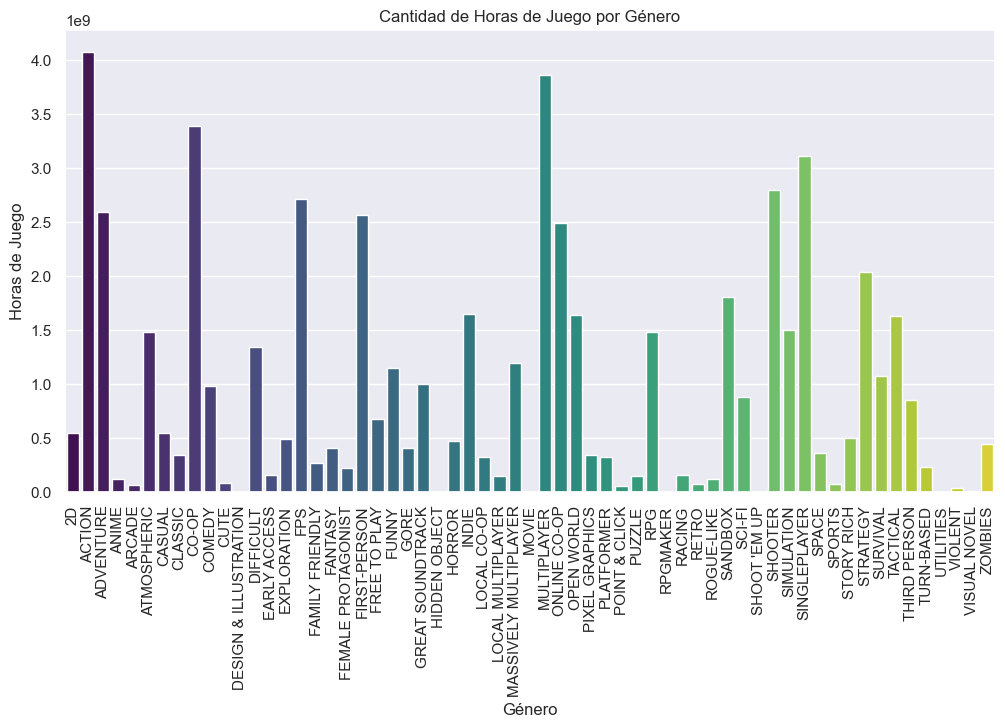

In [270]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.barplot(data=di,x='genero', y='playtime_forever', hue='genero', palette='viridis', dodge=False)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Género')
plt.ylabel('Horas de Juego')
plt.title('Cantidad de Horas de Juego por Género')
plt.show()

podemos ver que los juegos mas populares acumulan mas de 2 billones de horas

In [273]:
di2=di[di['playtime_forever']>2000000000]
di2 = di2.sort_values('playtime_forever', ascending=False)

realizamos un grafico con juegos con mas de 2 billones de horas

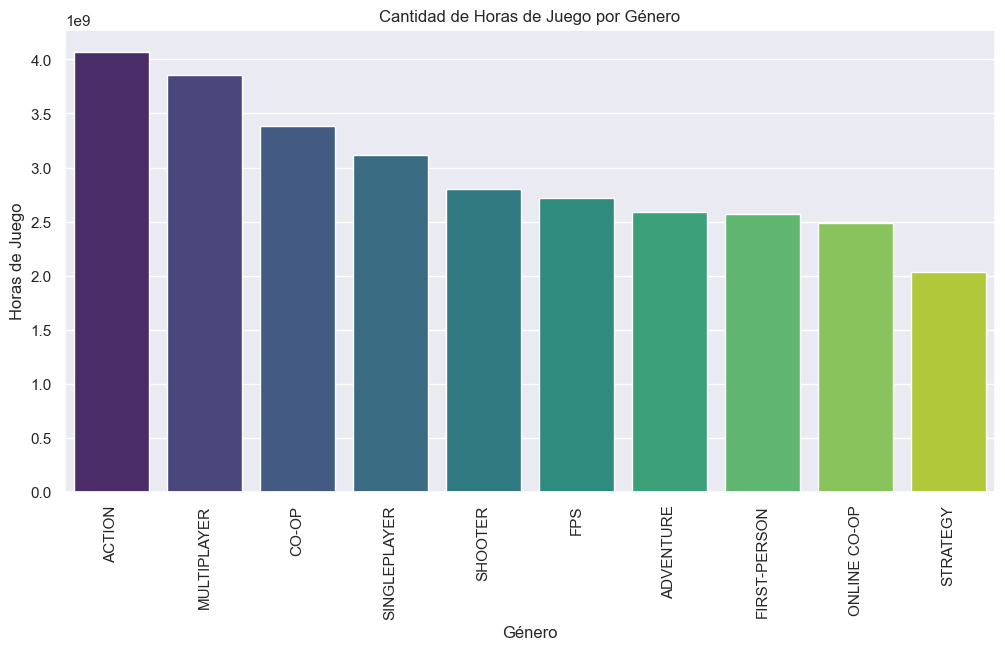

In [274]:
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.barplot(data=di2,x='genero', y='playtime_forever', hue='genero', palette='viridis', dodge=False)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Género')
plt.ylabel('Horas de Juego')
plt.title('Cantidad de Horas de Juego por Género')
plt.show()

Podemos concluir que el genero Action junto con Multiplayer y coop, encontramos buenas reseñas de usuarios sumados a la popularidad en horas de juego, por lo que si consideramos el desarrollo de un juego con estos generos, podriamos encontrarnos con una gran audiencia y aceptación, no obstante debido a la caida de reseñas en el ultimo año 2015, tendriamos que realizar el mismo analisis con datos actualizados para confirmar los generos más demandados.

In [280]:
df = pd.merge(items,games, on='item_id', how='inner')

In [281]:
df2=df[['item_id', 'playtime_forever', 'ACTION', 'MULTIPLAYER', 'CO-OP']].copy()

In [282]:
df2

,item_id,playtime_forever,ACTION,MULTIPLAYER,CO-OP
0,10,6,1,1,0
1,10,0,1,1,0
2,10,0,1,1,0
3,10,93,1,1,0
4,10,108,1,1,0
...,...,...,...,...,...
4251877,444770,46,0,0,0
4251878,375450,51,0,0,0
4251879,353390,0,0,0,0
4251880,354280,164,1,0,0


In [283]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251882 entries, 0 to 4251881
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   item_id           int32
 1   playtime_forever  int32
 2   ACTION            int8 
 3   MULTIPLAYER       int8 
 4   CO-OP             int8 
dtypes: int32(2), int8(3)
memory usage: 44.6 MB


In [285]:
df2=df2.groupby('item_id').sum()

In [290]:
df2=df2[(df2['ACTION'] > 0) & (df2['MULTIPLAYER'] > 0) & (df2['CO-OP'] > 0)]

In [293]:
df2 = df2.sort_values('playtime_forever', ascending=False)

In [294]:
df2

,playtime_forever,ACTION,MULTIPLAYER,CO-OP
item_id,,,,
730,794214205,44204,44204,44204
4000,452648840,43715,43715,43715
105600,156761011,29513,29513,29513
230410,124890229,26053,26053,26053
550,102991471,37392,37392,37392
...,...,...,...,...
434050,0,2,2,2
425310,0,1,1,1
324800,0,42,42,42


In [296]:
df3 = pd.merge(df2.head(5),gnames, on='item_id', how='left')

In [297]:
df3

,item_id,playtime_forever,ACTION,MULTIPLAYER,CO-OP,title,release_date
0,730,794214205,44204,44204,44204,Counter-Strike: Global Offensive,2012
1,4000,452648840,43715,43715,43715,Garry's Mod,2006
2,105600,156761011,29513,29513,29513,Terraria,2011
3,230410,124890229,26053,26053,26053,Warframe,2013
4,550,102991471,37392,37392,37392,Left 4 Dead 2,2009


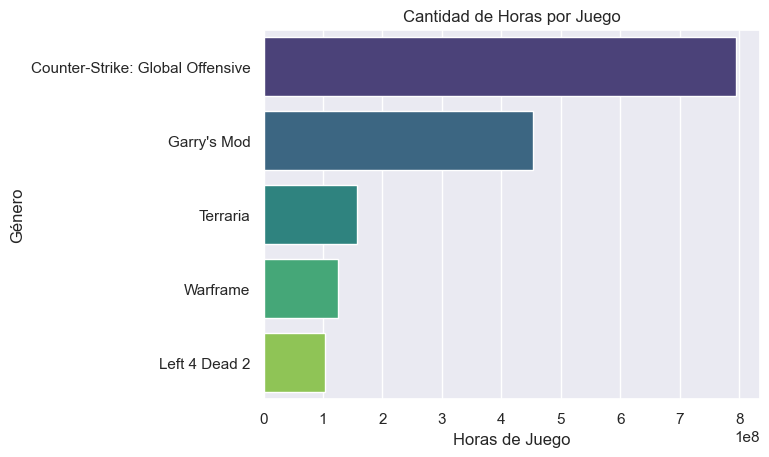

In [348]:
sns.barplot(data=df3, x='playtime_forever', y='title', hue='title', palette='viridis', dodge=False)

plt.xlabel('Horas de Juego')
plt.ylabel('Género')
plt.title('Cantidad de Horas por Juego')
plt.show()

segun los generos obtenidos como populares obtenemos este top 5 de juegos que estan dentro de ACTION, MULTIPLAYER y CO-OP	